## OVERVIEW OF DATASET
### 📊 Nigerian Financial Transactions and Fraud Detection Dataset

This synthetic dataset simulates **5 million Nigerian financial transactions** over a 12-month period, tailored for fraud detection and behavioral analysis. It includes **45 features** spanning transaction details, user behavior, device/IP intelligence, temporal patterns, and risk scores.

---

### 🔍 Key Characteristics

- **Fraud Rate**: ~15% (realistic for emerging markets)  
- **Unique Sender Accounts**: ~500,000  
- **Geographic Coverage**: 20 major cities across 6 Nigerian regions  
- **Payment Channels**: USSD, Mobile App, Card, Bank Transfer  
- **User Personas**: Salary Earner, Student, Trader  
- **Fraud Types**:
  - Account Takeover  
  - Identity Fraud  
  - SIM Swap  
  - Money Laundering  
  - Deposit Fraud  
  - Card-Not-Present  
  - Impossible Travel Fraud  

---

### ⚙️ Feature Engineering

- **No Data Leakage**: Expanding windows with `.shift(1)` logic  
- **Rolling Statistics**: Merchant fraud rate, user behavior metrics  
- **Temporal Consistency**: Chronologically computed features  
- **Realistic Patterns**: Based on Nigerian fintech behaviors  

---

### 🎯 Use Cases

- Supervised fraud detection model training  
- Real-time risk scoring system development  
- Behavioral analytics and segmentation  
- Unsupervised anomaly detection  
- Nigerian fintech research and benchmarking  

---

### ✅ Data Quality

- No missing values in critical fields  
- Logical consistency across features  
- Realistic transaction amounts and timing  
- Balanced fraud-to-legitimate ratio  

---

### ⚠️ Limitations

- Synthetic data — not based on real transactions  
- Limited to a 12-month simulation  
- May not capture evolving fraud patterns  
- Region-specific — tailored to Nigerian context  

---

### 💡 Recommended Usage

- Use as a training supplement, not a replacement for real data  
- Validate models on actual Nigerian transaction data  
- Retrain models regularly to adapt to evolving fraud tactics  
- Combine with external sources for production-grade systems

### Summary: Downloading the Nigerian Financial Transactions and Fraud Detection Dataset Locally

#### Steps Taken

1. **Installed Git LFS**
   ```powershell
   git lfs install
2. **generate a huggingface token(give read access)**   
3. **huggingface-cli login**   
4. **git clone https://huggingface.co/datasets/electricsheepafrica/  Nigerian-Financial-Transactions-and-Fraud-Detection-Dataset**
5. **cd Nigerian-Financial-Transactions-and-Fraud-Detection-Dataset**
6. **git lfs pull**



In [1]:
%pip install datasets psycopg2-binary sqlalchemy hf_xet


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (roc_auc_score, precision_recall_curve, auc,
                             classification_report, confusion_matrix, RocCurveDisplay,
                             PrecisionRecallDisplay)
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.inspection import permutation_importance
import shap
import warnings
warnings.filterwarnings('ignore')

In [3]:


df1 = pd.read_csv(r"C:\Users\PAMELA\Desktop\altschool-hackathon\Nigerian-Financial-Transactions-and-Fraud-Detection-Dataset\V1-nigerian-financial-transactions-and-fraud-detection-dataset.csv")
#df2 = pd.read_csv("C:/Users/PAMELA/Desktop/altschool-hackathon/Nigerian-Financial-Transactions-and-Fraud-Detection-Dataset/V2-nigerian-financial-transactions-and-fraud-detection-dataset-for-model-training.csv")

df1.head()


,transaction_id,timestamp,sender_account,receiver_account,transaction_type,merchant_category,location,device_used,is_fraud,fraud_type,...,spending_deviation_score,velocity_score,geo_anomaly_score,payment_channel,ip_address,device_hash,amount_ngn,bvn_linked,new_device_transaction,sender_persona
0,T100000,2023-08-27 09:03:17.516168,9899691027,5792850510,withdrawal,Data Subscription (Airtel),Lagos,mobile,False,NaN,...,-0.21,3,0.22,Bank Transfer,41.58.183.79,D8536477,1889724.49,True,False,Trader
1,T100001,2023-08-25 14:11:12.606711,2194178774,7275770518,withdrawal,Paystack Payment,Aba,atm,False,NaN,...,-0.14,7,0.96,Bank Transfer,102.89.45.175,D2622631,833885.14,True,False,Trader
2,T100002,2023-05-19 09:30:37.742963,4193666484,7538320427,deposit,ATM Withdrawal,Ibadan,pos,False,NaN,...,-1.78,20,0.89,Bank Transfer,41.58.151.43,D4823498,13860533.88,True,False,Trader
3,T100003,2023-10-28 07:26:44.195112,9174692071,9091723192,deposit,Konga Order,Ibadan,pos,False,NaN,...,-0.60,6,0.37,USSD,197.210.7.43,D9961380,2262024.07,True,False,Salary Earner
4,T100004,2023-09-16 17:58:14.700162,8722569311,5128595934,transfer,Airtime Top-up (MTN),Ibadan,mobile,False,NaN,...,0.79,13,0.27,USSD,102.89.36.146,D7637601,33718.63,True,False,Salary Earner


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000000 entries, 0 to 4999999
Data columns (total 21 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   transaction_id               object 
 1   timestamp                    object 
 2   sender_account               int64  
 3   receiver_account             int64  
 4   transaction_type             object 
 5   merchant_category            object 
 6   location                     object 
 7   device_used                  object 
 8   is_fraud                     bool   
 9   fraud_type                   object 
 10  time_since_last_transaction  float64
 11  spending_deviation_score     float64
 12  velocity_score               int64  
 13  geo_anomaly_score            float64
 14  payment_channel              object 
 15  ip_address                   object 
 16  device_hash                  object 
 17  amount_ngn                   float64
 18  bvn_linked                   bool   
 19  

In [5]:
df1.isnull()

,transaction_id,timestamp,sender_account,receiver_account,transaction_type,merchant_category,location,device_used,is_fraud,fraud_type,...,spending_deviation_score,velocity_score,geo_anomaly_score,payment_channel,ip_address,device_hash,amount_ngn,bvn_linked,new_device_transaction,sender_persona
0,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4999995,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4999996,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4999997,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4999998,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [6]:
df1.isnull().value_counts()

transaction_id  timestamp  sender_account  receiver_account  transaction_type  merchant_category  location  device_used  is_fraud  fraud_type  time_since_last_transaction  spending_deviation_score  velocity_score  geo_anomaly_score  payment_channel  ip_address  device_hash  amount_ngn  bvn_linked  new_device_transaction  sender_persona
False           False      False           False             False             False              False     False        False     True        False                        False                     False           False              False            False       False        False       False       False                   False             3923934
                                                                                                                                               True                         False                     False           False              False            False       False        False       False       False         

In [7]:
df1.isnull().sum()


transaction_id                       0
timestamp                            0
sender_account                       0
receiver_account                     0
transaction_type                     0
merchant_category                    0
location                             0
device_used                          0
is_fraud                             0
fraud_type                     4820447
time_since_last_transaction     896513
spending_deviation_score             0
velocity_score                       0
geo_anomaly_score                    0
payment_channel                      0
ip_address                           0
device_hash                          0
amount_ngn                           0
bvn_linked                           0
new_device_transaction               0
sender_persona                       0
dtype: int64

In [8]:
df1.columns

Index(['transaction_id', 'timestamp', 'sender_account', 'receiver_account',
       'transaction_type', 'merchant_category', 'location', 'device_used',
       'is_fraud', 'fraud_type', 'time_since_last_transaction',
       'spending_deviation_score', 'velocity_score', 'geo_anomaly_score',
       'payment_channel', 'ip_address', 'device_hash', 'amount_ngn',
       'bvn_linked', 'new_device_transaction', 'sender_persona'],
      dtype='object')

In [9]:
df1.sample(10)

,transaction_id,timestamp,sender_account,receiver_account,transaction_type,merchant_category,location,device_used,is_fraud,fraud_type,...,spending_deviation_score,velocity_score,geo_anomaly_score,payment_channel,ip_address,device_hash,amount_ngn,bvn_linked,new_device_transaction,sender_persona
1070544,T1170544,2023-10-14 16:43:54.783039,8571474183,3873352395,withdrawal,Other Transaction,Kaduna,web,False,NaN,...,0.13,4,0.31,Bank Transfer,102.89.32.254,D8585443,1000.00,True,True,Salary Earner
3705080,T3805080,2023-04-20 16:35:03.778543,9130452206,1882103157,deposit,Local Market Purchase,Kano,web,False,NaN,...,0.27,5,0.75,Card,105.113.37.39,D4962193,1229124.24,True,True,Salary Earner
718783,T818783,2023-02-24 11:24:10.804626,6222544080,8475089670,withdrawal,ATM Withdrawal,Ibadan,mobile,False,NaN,...,1.54,3,0.10,USSD,102.89.37.14,D3814545,82214.37,True,False,Salary Earner
732087,T832087,2023-11-22 09:12:37.480125,6147277216,3443110162,transfer,Other Transaction,Aba,pos,False,NaN,...,1.10,1,0.66,Mobile App,102.89.43.59,D5890391,14494.70,True,False,Salary Earner
1416311,T1516311,2023-06-26 15:13:38.399616,6736792057,2282793035,transfer,Other Transaction,Ibadan,web,False,NaN,...,0.10,9,0.10,Mobile App,102.89.39.196,D2583856,43919.17,True,False,Trader
2931487,T3031487,2023-08-27 17:32:11.419863,9097379438,9088391567,deposit,Bet9ja Stake,Onitsha,atm,False,NaN,...,0.81,17,0.86,Bank Transfer,197.210.7.33,D4241621,912722.03,True,True,Salary Earner
2778754,T2878754,2023-09-03 10:25:47.355789,1522936969,6564264837,deposit,Shoprite Purchase,Kaduna,mobile,False,NaN,...,0.16,4,0.18,Card,102.89.42.252,D8320141,1046196.26,True,False,Student
1621437,T1721437,2023-11-12 21:46:36.307096,3935658041,5667600273,withdrawal,Other Transaction,Abuja,atm,False,NaN,...,1.00,16,0.08,Bank Transfer,197.210.244.102,D5119510,21879.77,True,True,Student
2537382,T2637382,2023-04-28 19:49:54.558414,1718464931,8310309210,withdrawal,Other Transaction,Ibadan,pos,False,NaN,...,2.11,14,0.68,Mobile App,105.113.238.207,D9109373,10000.00,True,True,Trader
3586585,T3686585,2023-09-22 11:46:13.588831,1266775255,5913982092,payment,Ikeja Electric Bill,Lagos,web,False,NaN,...,-0.88,4,0.27,Mobile App,41.58.171.7,D5800579,93367.90,True,True,Student


In [10]:
column = ['fraud_type',
          'time_since_last_transaction',
          'transaction_id',
          'sender_account',
          'receiver_account',
          'ip_address',
          'device_hash']
df =df1.drop(columns=column)
df.head()

,timestamp,transaction_type,merchant_category,location,device_used,is_fraud,spending_deviation_score,velocity_score,geo_anomaly_score,payment_channel,amount_ngn,bvn_linked,new_device_transaction,sender_persona
0,2023-08-27 09:03:17.516168,withdrawal,Data Subscription (Airtel),Lagos,mobile,False,-0.21,3,0.22,Bank Transfer,1889724.49,True,False,Trader
1,2023-08-25 14:11:12.606711,withdrawal,Paystack Payment,Aba,atm,False,-0.14,7,0.96,Bank Transfer,833885.14,True,False,Trader
2,2023-05-19 09:30:37.742963,deposit,ATM Withdrawal,Ibadan,pos,False,-1.78,20,0.89,Bank Transfer,13860533.88,True,False,Trader
3,2023-10-28 07:26:44.195112,deposit,Konga Order,Ibadan,pos,False,-0.60,6,0.37,USSD,2262024.07,True,False,Salary Earner
4,2023-09-16 17:58:14.700162,transfer,Airtime Top-up (MTN),Ibadan,mobile,False,0.79,13,0.27,USSD,33718.63,True,False,Salary Earner


DATA CLEANING

In [11]:
#converting timestamp column to datetime format and then extract as individual columns
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.head()

,timestamp,transaction_type,merchant_category,location,device_used,is_fraud,spending_deviation_score,velocity_score,geo_anomaly_score,payment_channel,amount_ngn,bvn_linked,new_device_transaction,sender_persona
0,2023-08-27 09:03:17.516168,withdrawal,Data Subscription (Airtel),Lagos,mobile,False,-0.21,3,0.22,Bank Transfer,1889724.49,True,False,Trader
1,2023-08-25 14:11:12.606711,withdrawal,Paystack Payment,Aba,atm,False,-0.14,7,0.96,Bank Transfer,833885.14,True,False,Trader
2,2023-05-19 09:30:37.742963,deposit,ATM Withdrawal,Ibadan,pos,False,-1.78,20,0.89,Bank Transfer,13860533.88,True,False,Trader
3,2023-10-28 07:26:44.195112,deposit,Konga Order,Ibadan,pos,False,-0.60,6,0.37,USSD,2262024.07,True,False,Salary Earner
4,2023-09-16 17:58:14.700162,transfer,Airtime Top-up (MTN),Ibadan,mobile,False,0.79,13,0.27,USSD,33718.63,True,False,Salary Earner


In [12]:
df['hour']= df['timestamp'].dt.hour
df['day_of_week'] =df['timestamp'].dt.day_of_week
df['is_weekend'] = df['day_of_week'].isin([5,6]).astype(int)
df.head()

,timestamp,transaction_type,merchant_category,location,device_used,is_fraud,spending_deviation_score,velocity_score,geo_anomaly_score,payment_channel,amount_ngn,bvn_linked,new_device_transaction,sender_persona,hour,day_of_week,is_weekend
0,2023-08-27 09:03:17.516168,withdrawal,Data Subscription (Airtel),Lagos,mobile,False,-0.21,3,0.22,Bank Transfer,1889724.49,True,False,Trader,9,6,1
1,2023-08-25 14:11:12.606711,withdrawal,Paystack Payment,Aba,atm,False,-0.14,7,0.96,Bank Transfer,833885.14,True,False,Trader,14,4,0
2,2023-05-19 09:30:37.742963,deposit,ATM Withdrawal,Ibadan,pos,False,-1.78,20,0.89,Bank Transfer,13860533.88,True,False,Trader,9,4,0
3,2023-10-28 07:26:44.195112,deposit,Konga Order,Ibadan,pos,False,-0.60,6,0.37,USSD,2262024.07,True,False,Salary Earner,7,5,1
4,2023-09-16 17:58:14.700162,transfer,Airtime Top-up (MTN),Ibadan,mobile,False,0.79,13,0.27,USSD,33718.63,True,False,Salary Earner,17,5,1


In [13]:
df.drop('timestamp', axis=1, inplace=True)
df.head()

,transaction_type,merchant_category,location,device_used,is_fraud,spending_deviation_score,velocity_score,geo_anomaly_score,payment_channel,amount_ngn,bvn_linked,new_device_transaction,sender_persona,hour,day_of_week,is_weekend
0,withdrawal,Data Subscription (Airtel),Lagos,mobile,False,-0.21,3,0.22,Bank Transfer,1889724.49,True,False,Trader,9,6,1
1,withdrawal,Paystack Payment,Aba,atm,False,-0.14,7,0.96,Bank Transfer,833885.14,True,False,Trader,14,4,0
2,deposit,ATM Withdrawal,Ibadan,pos,False,-1.78,20,0.89,Bank Transfer,13860533.88,True,False,Trader,9,4,0
3,deposit,Konga Order,Ibadan,pos,False,-0.60,6,0.37,USSD,2262024.07,True,False,Salary Earner,7,5,1
4,transfer,Airtime Top-up (MTN),Ibadan,mobile,False,0.79,13,0.27,USSD,33718.63,True,False,Salary Earner,17,5,1


In [14]:
cols= ['is_fraud','bvn_linked','new_device_transaction']
for col in cols:
    df[col] = df[col].astype(int)


In [15]:
# Count total duplicate rows
num_duplicates = df.duplicated().sum()
print(f"Number of exact duplicate rows: {num_duplicates}")

Number of exact duplicate rows: 0


FEATURE ENGINEERING

In [16]:
categorical_cols = [
    'transaction_type', 'merchant_category', 'location',
    'device_used', 'payment_channel', 'sender_persona'
]

numeric_cols = [
    'spending_deviation_score',
    'velocity_score', 'geo_anomaly_score', 'hour', 'day_of_week',
    'is_weekend'
]

is_fraud                    1.000000
velocity_score              0.000370
geo_anomaly_score           0.000311
spending_deviation_score    0.000201
day_of_week                -0.000078
is_weekend                 -0.000238
hour                       -0.000881
Name: is_fraud, dtype: float64


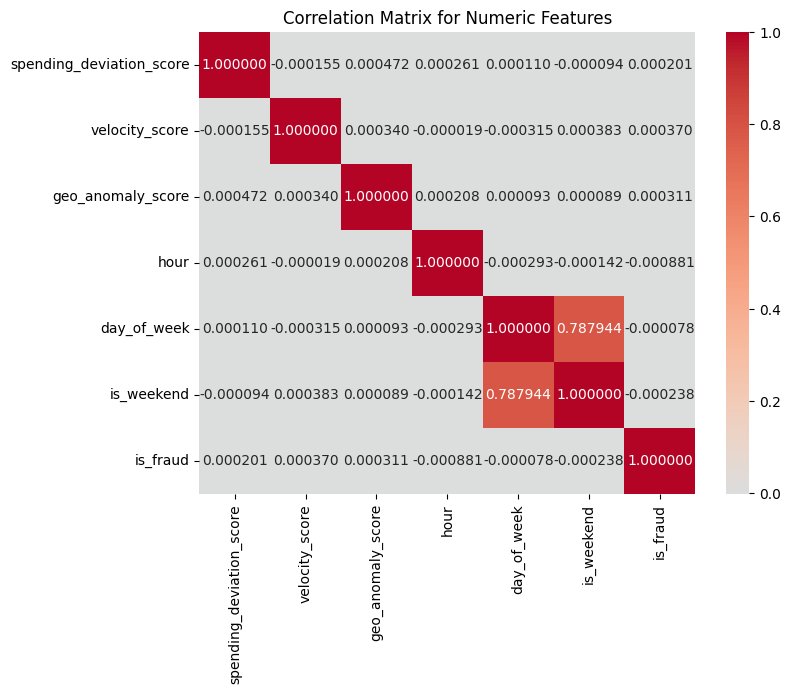

In [17]:
# Correlation with target
corr_matrix = df[numeric_cols + ['is_fraud']].corr()
print(corr_matrix['is_fraud'].sort_values(ascending=False))

# Plot
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, fmt=".6f", cmap='coolwarm', center=0)
plt.title("Correlation Matrix for Numeric Features")
plt.show()

In [18]:
for col in categorical_cols:
    fraud_rate = df.groupby(col)['is_fraud'].mean().sort_values(ascending=False)
    print(f"\nFraud rate by {col}:\n", fraud_rate)


Fraud rate by transaction_type:
 transaction_type
transfer      0.036253
withdrawal    0.035938
deposit       0.035812
payment       0.035640
Name: is_fraud, dtype: float64

Fraud rate by merchant_category:
 merchant_category
SPAR Purchase                 0.036651
Church Offering               0.036513
SportyBet Deposit             0.036483
Konga Order                   0.036354
Arik Air Flight               0.036270
Bolt Ride                     0.036100
POS Withdrawal                0.036091
Ikeja Electric Bill           0.036066
Bet9ja Stake                  0.036041
Data Subscription (Airtel)    0.035999
Paystack Payment              0.035817
Other Transaction             0.035804
Filmhouse Cinemas Ticket      0.035772
ATM Withdrawal                0.035738
Local Market Purchase         0.035735
Shoprite Purchase             0.035696
Airtime Top-up (MTN)          0.035636
Jumia Purchase                0.035634
ABC Transport Ticket          0.035531
Flutterwave Payment           0.

In [20]:
"""
from sklearn.ensemble import RandomForestClassifier

# Prepare numeric + one-hot categorical
df_model = pd.get_dummies(df.drop(columns=['is_fraud']), drop_first=True)
X = df_model
y = df['is_fraud']

# Fit Random Forest
rf = RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced')
rf.fit(X, y)

# Feature importance
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).head(20)
"""


"\nfrom sklearn.ensemble import RandomForestClassifier\n\n# Prepare numeric + one-hot categorical\ndf_model = pd.get_dummies(df.drop(columns=['is_fraud']), drop_first=True)\nX = df_model\ny = df['is_fraud']\n\n# Fit Random Forest\nrf = RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced')\nrf.fit(X, y)\n\n# Feature importance\nimportances = pd.Series(rf.feature_importances_, index=X.columns)\nimportances.sort_values(ascending=False).head(20)\n"

CLASS IMBALANCE

In [21]:
# Count of fraud vs non-fraud
fraud_counts = df['is_fraud'].value_counts()
print(fraud_counts)

# Proportion
fraud_proportion = df['is_fraud'].value_counts(normalize=True)
print(fraud_proportion)

is_fraud
0    4820447
1     179553
Name: count, dtype: int64
is_fraud
0    0.964089
1    0.035911
Name: proportion, dtype: float64


In [23]:


X = df.drop(columns=['is_fraud'])
y = df['is_fraud']

# Convert booleans
X['bvn_linked'] = X['bvn_linked'].astype(int)
X['new_device_transaction'] = X['new_device_transaction'].astype(int)

# Apply label encoding to categorical columns
cat_cols = X.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in cat_cols:
    X[col] = le.fit_transform(X[col].astype(str))


In [25]:
# Install imblearn if not already installed
# pip install imbalanced-learn
"""
from imblearn.combine import SMOTEENN
from collections import Counter



# 1. Create SMOTEENN object
sme = SMOTEENN(random_state=42, n_jobs=-1)

# 2. Apply resampling
X_res, y_res = sme.fit_resample(X, y)

print("Before:", Counter(y))
print("After:", Counter(y_res))
"""

                                                                                                                                                                                                              

'\nfrom imblearn.combine import SMOTEENN\nfrom collections import Counter\n\n\n\n# 1. Create SMOTEENN object\nsme = SMOTEENN(random_state=42, n_jobs=-1)\n\n# 2. Apply resampling\nX_res, y_res = sme.fit_resample(X, y)\n\nprint("Before:", Counter(y))\nprint("After:", Counter(y_res))\n'

In [26]:
#from imblearn.over_sampling import BorderlineSMOTE

#smote = BorderlineSMOTE(random_state=42)
#X_resampled, y_resampled = smote.fit_resample(X, y)
